# K nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from collections import Counter

## create some data

In [2]:
dataset = {'g': [[1, 2],
                [2, 3],
                [3, 1]],
          'r': [[6, 5],
               [7, 7],
               [8, 6]]}
new_feature = [5, 7]

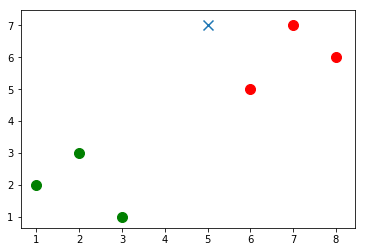

In [3]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)  # size and color
plt.scatter(new_feature[0], new_feature[1], s=100, marker='x')

## write basic algorithm

In [4]:
def euclidean_distance(arr1, arr2):
#     distance = np.sqrt(
#         np.sum(
#             (np.array(features) - np.array(predict))**2
#         ))
    distance = np.linalg.norm(np.array(arr1) - np.array(arr2))
    return distance

In [5]:
def knn(data, predict, k=3):
    if len(data) >= k:
        # if you have suppose five groups and value of k equals to 3 then it may happen that the actual class to which
        # the feature belong may get 2 votes and you will get lesser accuracy as a result. So, it is better to have k
        # greater than the number of groups to be more accurate with your model
        warnings.warn('K is set to less than number of groups')
    distances = []
    for group in data:
        for features in data[group]:  # e.g. dataset['k'] = [[1, 2], [2, 3], [3, 1]]
            euclidean_dist = euclidean_distance(features, predict)
            distances.append([euclidean_dist, group])
    print(distances)
    votes = [i[1] for i in sorted(distances)[:k]]  # fist k shortest distances
    print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]  # most common votes (majority vote)
    print(Counter(votes).most_common(1))
    
    return vote_result

In [6]:
result = knn(dataset, new_feature, 3)
result

[[6.4031242374328485, 'g'], [5.0, 'g'], [6.324555320336759, 'g'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

most voted calss is 'r', (all three are 'r')  
so class of new feature is r

## plot

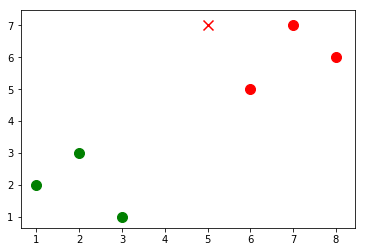

In [7]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)  # size and color
plt.scatter(new_feature[0], new_feature[1], s=100, marker='x', color=result)